In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

market_data_scaled = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])

In [6]:
# Create a DataFrame with the scaled data
columns_market_data = ["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]

df_market_data_scaled = pd.DataFrame(market_data_scaled, columns=columns_market_data, index=df_market_data.index)

# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index


# Set the coinid column as index
df_data_scaled = df_market_data_scaled.set_index("coin_id")

# Display sample data
df_data_scaled.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))

print(k)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [8]:
# Create an empty list to store the inertia values
inertia = []
numeric_columnss = df_market_data_scaled.select_dtypes(include=['float64']).columns

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

data_for_clustering = df_market_data_scaled[numeric_columnss]


for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(data_for_clustering)
    inertia.append(model.inertia_)

c:\Users\Ibsar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ibsar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ibsar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ibsar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

df_elbow.head()

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.302379


In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4  

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4, random_state=0)

In [12]:
# Fit the K-Means model using the scaled data
k_model.fit(data_for_clustering)

c:\Users\Ibsar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ibsar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_3 = k_model.predict(data_for_clustering)

# Print the resulting array of cluster values.
print(k_3)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [14]:
# Create a copy of the DataFrame
df_market_data_k_3 = data_for_clustering.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_k_3["PredictedClustersK3"] = k_3

# Display sample data
df_market_data_k_3.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,PredictedClustersK3
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [16]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df_market_data_k_3.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="PredictedClustersK3",
    hover_cols=["coin_id"]
)

:NdOverlay   [PredictedClustersK3]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_oc_df = pca.fit_transform(df_market_data_scaled[columns_market_data])

# View the first five rows of the DataFrame. 
print("\nPCA Data:")
print(pca_oc_df[:5])



PCA Data:
[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [19]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_

print("\nExplained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {ratio:.4f}")


Explained Variance Ratio:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Explained Vairance Ratio:

PC1: 0.3720

PC2: 0.3470

PC3: 0.1760

In [20]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(pca_oc_df, columns=["PC1", "PC2", "PC3"])

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
df_pca["coin_id"] = df_market_data.index

# Set the coinid column as index
df_pca = df_pca.set_index("coin_id")

# Display sample data
print("\nDataFrame with PCA Data:")
print(df_pca.head())


DataFrame with PCA Data:
                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))

print("\nList of k-values for PCA:")
print(k)


List of k-values for PCA:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [22]:
# Create an empty list to store the inertia values
inertia = []

numeric_columns_pca = df_pca.select_dtypes(include=['float64']).columns

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

data_for_clustering_pca = df_pca[numeric_columns_pca]

for i in k:
    model_pca = KMeans(n_clusters=i, random_state=0)
    model_pca.fit(data_for_clustering_pca)
    inertia.append(model_pca.inertia_)


c:\Users\Ibsar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ibsar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ibsar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ibsar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

df_elbow_pca.head()

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.839466


In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.hvplot.line(
    x="k",
    y="inertia",
    title="PCA Elbow Curve",
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**

  5


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**
  
  it differs by 2 integers

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
k_model_pca = KMeans(n_clusters=3, random_state=0)

In [26]:
# Fit the K-Means model using the PCA data
k_model_pca.fit(df_pca)

c:\Users\Ibsar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ibsar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_pca = k_model_pca.predict(df_pca)

# Print the resulting array of cluster values.
print("\nPredicted Clusters using PCA:")
print(k_pca)

# Print the resulting array of cluster values.




Predicted Clusters using PCA:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0
 1 1 1 1]


In [28]:
# Create a copy of the DataFrame with the PCA data
df_market_data_k_pca = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_data_k_pca["PredictedClustersK_PCA"] = k_pca

# Display sample data
print("\nDataFrame with Predicted Clusters using PCA:")
print(df_market_data_k_pca.head(5))


DataFrame with Predicted Clusters using PCA:
                   PC1       PC2       PC3  PredictedClustersK_PCA
coin_id                                                           
bitcoin      -0.600667  0.842760  0.461595                       1
ethereum     -0.458261  0.458466  0.952877                       1
tether       -0.433070 -0.168126 -0.641752                       1
ripple       -0.471835 -0.222660 -0.479053                       1
bitcoin-cash -1.157800  2.041209  1.859715                       1


In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot_pca = df_market_data_k_pca.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="PredictedClustersK_PCA",
    hover_cols=["coin_id"],
    title='Cluster Analysis using PCA'
)

scatter_plot_pca

:NdOverlay   [PredictedClustersK_PCA]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

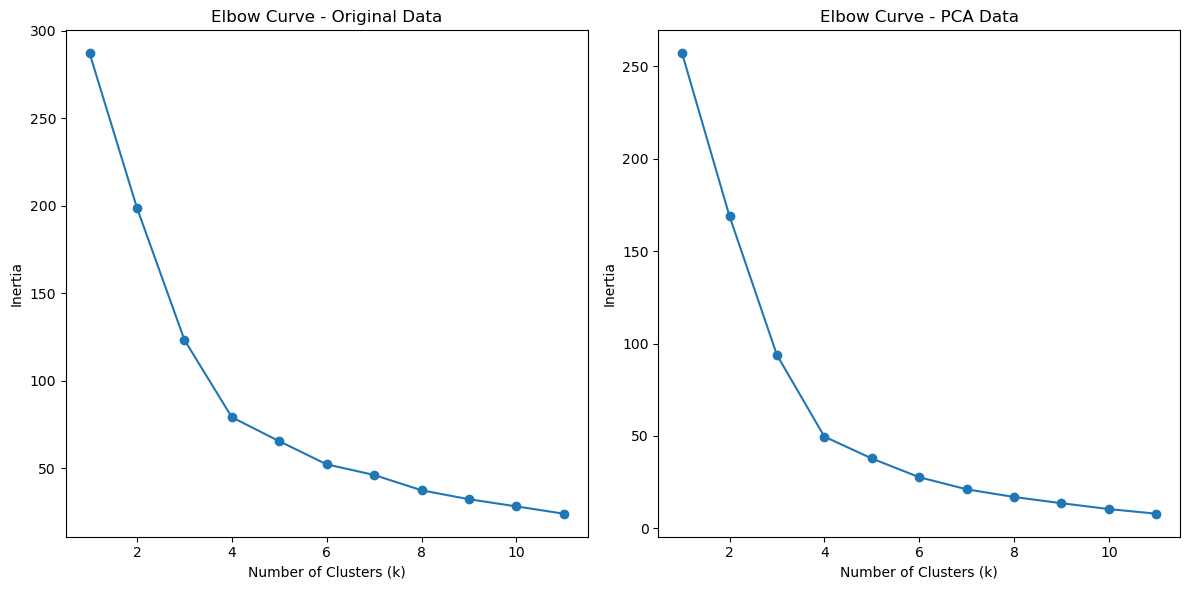

In [30]:
# Composite plot to contrast the Elbow curves

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve - Original Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot the Elbow curve for the PCA data
plt.subplot(1, 2, 2)
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o')
plt.title('Elbow Curve - PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

In [31]:
# Composite plot to contrast the clusters

# Scatter plot for original data
scatter_original = df_market_data_k_3.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="PredictedClustersK3",
    hover_cols=["coin_id"],
    title='Cluster Analysis - Original Data'
)

# Scatter plot for PCA data
scatter_pca = df_market_data_k_pca.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="PredictedClustersK_PCA",
    hover_cols=["coin_id"],
    title='Cluster Analysis - PCA Data'
)

# Display the composite plot
(scatter_original + scatter_pca).cols(2)

:Layout
   .NdOverlay.I  :NdOverlay   [PredictedClustersK3]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [PredictedClustersK_PCA]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** It causes a wider spread of the predicted clusters.